<a href="https://colab.research.google.com/github/moraleseconomia/CodeR/blob/master/UNI_Tarea_No_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

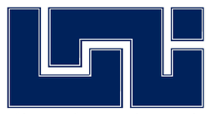

</center>

<h1><b>
Dirección de Estudios de Posgrado y Educación Continua
<h2><b>
Analítica Predictiva y Machine Learning con R, Python y Databricks

[UNI-DEPEC](https://posgrado.uni.edu.ni)

~~~Python
Morales León, Deybi Antonio
~~~

# **Tarea Modelo no Supervisado**

## **Clustering**


# Clustering con Método K-Means en Python


En este ejercicio vamos a clasificar los países según los indicadores económicos y sociales que se consideran para calcular el Índice de Felicidad.

El **índice global de felicidad** es una publicación anual de las Naciones Unidas que mide la felicidad en 157 países, basándose en diversos factores, en este caso les llamaremos variables. Esta data recopila la contribución de cada uno de esos factores a la felicidad.

La data se obtuvo para el año 2019. Se encuentra en Kaggle ya en formato csv. La hemos resubido a github para su fácil disponibilidad.

Las variables que se van a utilizar son:

*GDP per capita*: El Pib per cápita. Lo que produce el país divido entre su número de habitantes.

*Social support*: Apoyo social.

*Healthy life expectancy*: Esperanza de vida.

*Freedom to make life choices*: Libertad.

*Generosity*: Generosidad.

*Perceptions of corruption*: Percepción de la corrupción en el país.

Tales variables las utilizaremos para agrupar y describir sus similitudes.

## Módulos usados:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

## Cargando base de datos

In [2]:
felicidad = pd.read_csv('/content/drive/MyDrive/CURSO UNI/CIENCIAS DE DATOS/MODULO 2/Semana 6/2019.csv', engine='python')

In [3]:
felicidad.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [4]:
felicidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


## Seleccionados las variables a utilizar

In [5]:
felicidad_variables=felicidad.drop(['Overall rank', 'Country or region', 'Score'], axis=1)

In [6]:
felicidad_variables.describe()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


## Revisando Correlaciones

In [7]:
corr_matrix = felicidad_variables.select_dtypes(include=['float64', 'int']).corr(method='spearman')

In [8]:
corr_matrix.style.background_gradient(cmap='magma').set_precision(2)

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
GDP per capita,1.00,0.77,0.85,0.39,-0.04,0.22
Social support,0.77,1.00,0.73,0.45,0.01,0.11
Healthy life expectancy,0.85,0.73,1.00,0.41,-0.01,0.17
Freedom to make life choices,0.39,0.45,0.41,1.00,0.32,0.40
Generosity,-0.04,0.01,-0.01,0.32,1.00,0.29
Perceptions of corruption,0.22,0.11,0.17,0.40,0.29,1.00


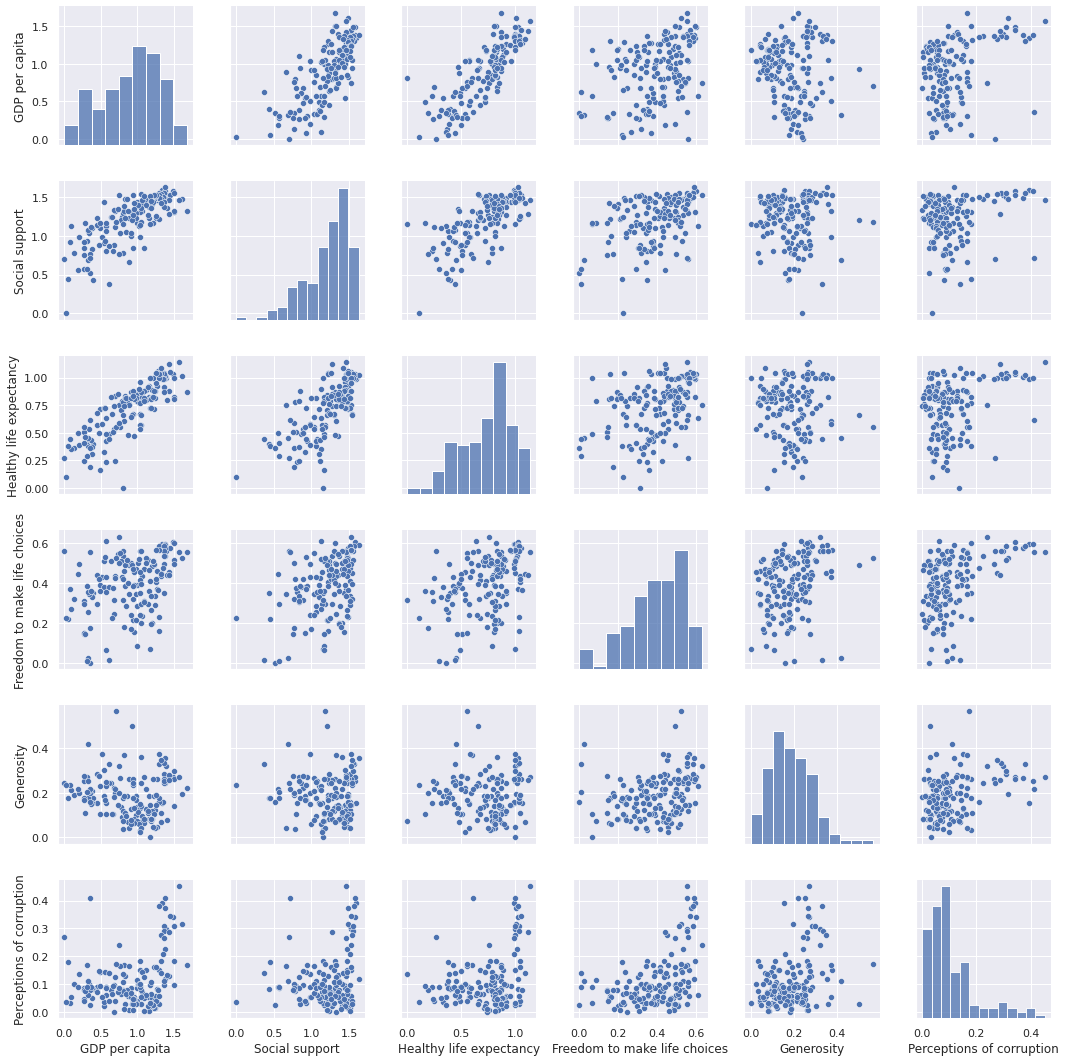

In [9]:
sns.pairplot(felicidad_variables)

Algunas de las variables parecen tener una correlación lineal.

## Normalizar los valores para que se encuentren dentro del mismo rango

Procedo a normalizar los valores, con la metodología de scikit para colocarlos entre 0 y 1. Esto le facilita al algoritmo su trabajo con los datos.

In [10]:
#felicidad_norm = (felicidad_variables-felicidad_variables.min())/(felicidad_variables.max()-felicidad_variables.min())
felicidad_norm = preprocessing.MinMaxScaler().fit_transform(felicidad_variables)
felicidad_norm = pd.DataFrame(felicidad_norm, columns=[felicidad_variables.columns])

Comprobando que los datos se han distribuido entre 0 y 1. Mínimo es 0, Máximo 1.

In [11]:
felicidad_norm.describe()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.537498,0.744344,0.635621,0.622140,0.326583,0.244156
std,0.236573,0.184231,0.212203,0.227083,0.168294,0.208693
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.357928,0.650092,0.480061,0.488114,0.192138,0.103753
50%,0.570071,0.782943,0.691499,0.660856,0.313604,0.188742
75%,0.731888,0.894397,0.772787,0.803883,0.438604,0.311810
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
felicidad_norm.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,0.795724,0.977217,0.864154,0.944532,0.270318,0.867550
1,0.821259,0.968596,0.872918,0.938193,0.445230,0.905077
2,0.883610,0.974138,0.900964,0.955626,0.478799,0.752759
3,0.819477,1.000000,0.899211,0.936609,0.625442,0.260486
4,0.828979,0.937192,0.875548,0.882726,0.568905,0.657837


## Elaboramos un Análisis de Componentes Principales para afinar la agrupación en Clusters.

In [13]:
felicidad_norm = preprocessing.MinMaxScaler().fit_transform(felicidad_variables)
pca = PCA()
pca.fit(felicidad_norm)

PCA()

In [14]:
pca.explained_variance_ratio_

array([0.53391479, 0.2150508 , 0.10550535, 0.07662999, 0.03839701,
       0.03050207])

Text(0, 0.5, 'Cumulative Explained Variance')

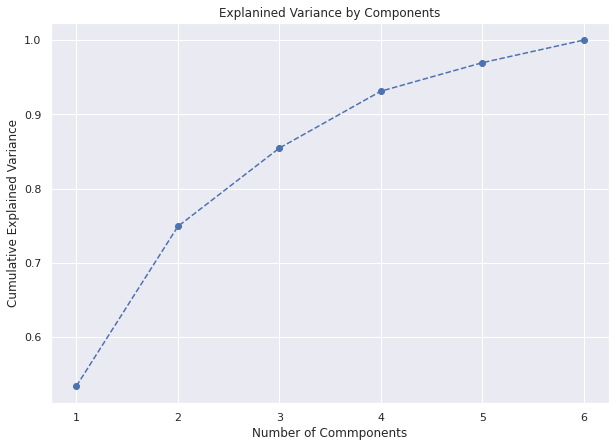

In [15]:
plt.figure(figsize=(10,7))
plt.plot(range(1,7), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle='--')
plt.title('Explanined Variance by Components')
plt.xlabel('Number of Commponents')
plt.ylabel('Cumulative Explained Variance')

In [16]:
pca = PCA(n_components = 2)

In [17]:
pca.fit(felicidad_norm)

PCA(n_components=2)

In [18]:
pca.transform(felicidad_norm)

array([[-6.65255851e-01,  3.02545454e-01],
       [-6.96071330e-01,  3.96852232e-01],
       [-7.13376302e-01,  3.08581134e-01],
       [-5.44468495e-01,  1.07410537e-01],
       [-6.01075772e-01,  2.92846873e-01],
       [-6.78277674e-01,  2.88293772e-01],
       [-6.47714129e-01,  3.56688236e-01],
       [-6.60355969e-01,  4.31079242e-01],
       [-6.24954051e-01,  2.94523322e-01],
       [-5.22898098e-01,  1.22733977e-01],
       [-6.11529195e-01,  2.84767432e-01],
       [-3.00378637e-01, -2.89712189e-02],
       [-2.96391653e-01, -1.51512136e-01],
       [-6.50527875e-01,  1.44559161e-01],
       [-5.02589299e-01,  2.15535122e-01],
       [-6.23304627e-01,  2.31786098e-01],
       [-5.05606339e-01,  1.65805490e-01],
       [-4.55903801e-01, -9.41205856e-03],
       [-3.65637527e-01, -8.66875203e-03],
       [-2.64868020e-01, -3.04015632e-01],
       [-4.56283806e-01,  1.73407444e-01],
       [-4.83880354e-01,  1.78659368e-01],
       [-1.39424390e-01, -1.83077374e-01],
       [-4.

In [19]:
scores_pca = pca.transform(felicidad_norm)

## Obtenemos el número de clusters a aplicar.

In [20]:
wcss = []
for i in range(1,21):
  kmeans_pca = KMeans(n_clusters=i, init = 'k-means++', random_state = 42)
  kmeans_pca.fit(scores_pca)
  wcss.append(kmeans_pca.inertia_)

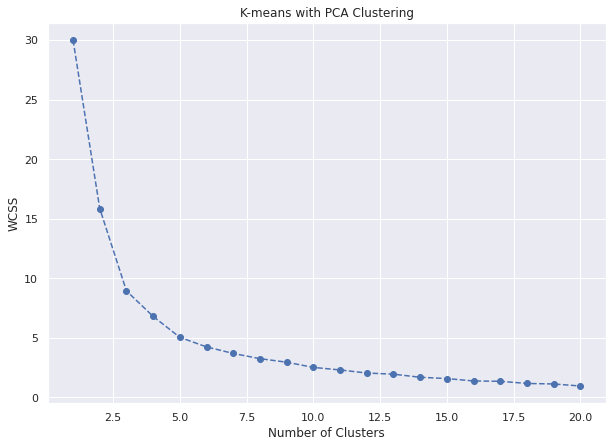

In [21]:
plt.figure(figsize=(10,7))
plt.plot(range(1, 21), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [22]:
kmeans_pca = KMeans(n_clusters=3, init = 'k-means++', random_state=42)

Según la gráfica anterior deberíamos conformar 3 clústeres.

In [23]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=3, random_state=42)

In [24]:
df_felicidad_pca_kmeans = pd.concat([felicidad.reset_index(drop=True), pd.DataFrame(scores_pca)], axis = 1)
df_felicidad_pca_kmeans.columns.values[-2: ] = ['Component 1', 'Component 2']
df_felicidad_pca_kmeans['Segment k-means PCA'] = kmeans_pca.labels_

In [25]:
df_felicidad_pca_kmeans.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Component 1,Component 2,Segment k-means PCA
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,-0.665256,0.302545,1
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,-0.696071,0.396852,1
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,-0.713376,0.308581,1
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,-0.544468,0.107411,1
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,-0.601076,0.292847,1


In [26]:
df_felicidad_pca_kmeans['Segment'] = df_felicidad_pca_kmeans['Segment k-means PCA'].map({0:'first',
                                1: 'second',
                                2: 'third'})

In [27]:
fig = px.scatter(df_felicidad_pca_kmeans, x="Component 1", y = "Component 2", 
                 size='Score', 
                 color="Segment")
fig.update_traces(textposition="bottom right")
fig.show()

q

In [28]:
fig = px.scatter(df_felicidad_pca_kmeans, x="Component 1", y = "Component 2", 
                 size='Score', 
                 color="Segment",
                 text = 'Country or region')
fig.update_traces(textposition="bottom right")
fig.show()

Si le agregamos los países notamos que Nueva Zelanda, Suiza, Luxemburgo, Japan, etc, países que se caracterizan por tener alto PIB per cápita quedaron en el segundo grupo.

Hay otro grupo que se conforma con Sudán, Somalia, Kenya, Zambia, Afganistan, etc. Que son países cuya cultura tiende a ser violenta y de política y economía inestable según las noticias.

Un tercer cluster se compone mayormente de algunos países europeos y latinos, quizás no son violentos culturalmente pero sus políticas y economía pueden ser inestables.

El tamaño que contiene cada punto es lo que los ciudadanos de cada país declararon como sus niveles de felicidad. Mencionar un número de 0 a 10, donde 0 es peor y 10 es la mayor felicidad posible.

En promedio los mayores niveles de felicidad están en países que comparten ciertas características.

In [29]:
fig = px.scatter(df_felicidad_pca_kmeans, x="GDP per capita", y = "Healthy life expectancy", 
                 size='Score', 
                 color="Segment",
                 text = 'Country or region')
fig.update_traces(textposition="bottom right")
fig.show()

Según la gráfica anterior los países que tienen altos niveles de felicidad tiene altos ingresos o mejor economía y altas expectativa de vida. Clúster 2.

Mientras que el Clúster 1, son países que tienen bajo nivel económico y poca expectativa de vida y salud.

In [30]:
fig = px.scatter(df_felicidad_pca_kmeans, x="GDP per capita", y = "Freedom to make life choices", 
                 size='Score', 
                 color="Segment",
                 text = 'Country or region')
fig.update_traces(textposition="bottom right")
fig.show()

Los países con mayores niveles de PIB per cápita también tienen altos niveles de libertad.

In [31]:
fig = px.scatter(df_felicidad_pca_kmeans, x="GDP per capita", y = "Perceptions of corruption", 
                 size='GDP per capita', 
                 color="Segment",
                 text = 'Country or region')
fig.update_traces(textposition="bottom right")
fig.show()

Entre mayores niveles de Pib per cápita mayor es la percepción de corrupción.

In [35]:
df_felicidad_pca_kmeans.groupby('Segment k-means PCA').mean()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Component 1,Component 2
Segment k-means PCA,,,,,,,,,,
0,125.872340,4.265277,0.409638,0.877766,0.428638,0.329468,0.217170,0.101362,0.427642,0.162176
1,17.708333,6.989250,1.393708,1.489625,0.985500,0.547375,0.274042,0.274042,-0.561412,0.221754
2,69.470588,5.591729,1.041188,1.312576,0.815765,0.383753,0.141788,0.069565,-0.077945,-0.152287


# **Conclusiones**


El modelo agrupa los países en tres clústeres. En los cuales el primer clúster agrupa a los países con bajo niveles de las variables presentadas y según las percepciones de sus habitantes son países con bajos niveles de felicidad.

El segundo cluster son países con altos promedios de las variables analizadas, al ser así se esperan que tengan los mayores niveles de felicidad en el mundo.

El tercer clúster contiene los países con niveles medios de felicidad.
